In [1]:
import pymongo

In [2]:
conn=pymongo.MongoClient("mongodb://localhost:27017/")['backdoor']

## GTSB BadNets -> BTSC Finetuning

In [3]:
tm2_gtsb_badnet = list(conn['tm2_v3_TEST:badnet'].find({}))
tm2_btsc_badnet = list(conn['tm2_v3_btsc_badnet:finetune'].find({}))

In [4]:
list(conn['tm2_v3_btsc_badnet:finetune'].find({'original_model': 'weights/tm2_v3_TEST:badnet_0.00046279189297006936_5b55b4.pth'}))

[{'_id': ObjectId('623b1214f9c6368bc116deed'),
  'args': {'prefix': 'tm2_v3_btsc_badnet',
   'dataset': 'BTSC',
   'trials': 1,
   'seed': 0,
   'load_model': 'weights/tm2_v3_TEST:*.pth',
   'trigger': "checkerboard('bottomleft', (3, 3), colours=(255, 0))",
   'backdoor_class': 6,
   'mongo_url': 'mongodb://100.83.104.36:27017/',
   'weights_path': 'weights',
   'epochs': 20,
   'learning_rate': 0.01,
   'device': 'cuda',
   'no_batchnorm': False,
   'use_wandb': False,
   'no_annealing': False,
   'no_dataaug': False},
  'history': [{'train_stats': {'train_eval_loss': 0.1257153048757956,
     'train_eval_acc': 0.9616381544841887},
    'test_stats': {'test_eval_loss': 0.33652319888075366,
     'test_eval_acc': 0.8755085435313262},
    'test_bd_stats': {'test_bd_loss': 10.534934500934051,
     'test_bd_acc': 0.02034174125305126}},
   {'train_stats': {'train_eval_loss': 0.06880385002933401,
     'train_eval_acc': 0.9766718506998445},
    'test_stats': {'test_eval_loss': 0.184995430629651

In [5]:
tm2_btsc_badnet[0]['original_model']

'weights/tm2_v3_TEST:badnet_0.0005538896115368571_506221.pth'

In [6]:
data = []

for model in tm2_gtsb_badnet:
    if not model['success']:
        print('failed')
        continue
    
    res = model['result']
    
    # Find the associate finetuned result
    ft_result = list(conn['tm2_v3_btsc_badnet:finetune'].find({'original_model': res['weights']}))
    if len(ft_result) != 1:
        print(len(ft_result), '???')
        continue
        
    ft_res = ft_result[0]['stats']
#     print(ft_res.keys())
    
    
    print(f"{res['test_stats']['test_eval_acc']:.4f} {res['test_bd_stats']['test_bd_acc']:.4f} -> "\
          f"{ft_res['test_stats']['test_eval_acc']:.4f} {ft_res['test_bd_stats']['test_bd_acc']:.4f}")
    
    data.append([
        res['test_stats']['test_eval_acc'],
        res['test_bd_stats']['test_bd_acc'],
        ft_res['test_stats']['test_eval_acc'],
        ft_res['test_bd_stats']['test_bd_acc']
    ])
#     break

0.9618 0.0765 -> 0.9772 0.0195
0.9634 0.0828 -> 0.9829 0.0212
0.9546 0.0871 -> 0.9528 0.0203
0.9607 0.0753 -> 0.9731 0.0220
0.8421 0.0738 -> 0.9756 0.0212
0.8393 0.0626 -> 0.9910 0.0195
0.8290 0.8910 -> 0.9878 0.3930
0.9638 0.9943 -> 0.9642 0.8902
0.9558 0.9963 -> 0.9658 0.9894
0.9595 0.9994 -> 0.9715 0.9780
0.9622 0.9996 -> 0.9585 1.0000
0.9411 0.9994 -> 0.9919 0.9935
0.9219 0.9994 -> 0.9691 0.9919
0.9673 0.9996 -> 0.9390 0.9976
0.9677 0.0814 -> 0.9683 0.0195
0.9268 0.0775 -> 0.9837 0.0203
0.8800 0.9260 -> 0.9886 0.6599
0.9564 0.9123 -> 0.9569 0.8063
0.9245 1.0000 -> 0.9479 0.9992
0.9683 1.0000 -> 0.9536 1.0000
0.9671 0.9971 -> 0.9569 0.9593
0.9252 1.0000 -> 0.9886 1.0000
0.9683 1.0000 -> 0.9260 1.0000
0.9479 1.0000 -> 0.9764 1.0000
0.9517 0.0871 -> 0.9894 0.0203
0.9683 0.0753 -> 0.9146 0.0195
0.9626 1.0000 -> 0.9845 1.0000
0.9479 1.0000 -> 0.9813 1.0000
0.9589 0.0695 -> 0.9845 0.0203
0.9554 0.0748 -> 0.9170 0.0203
0.8370 1.0000 -> 0.9788 0.9463
0.8569 1.0000 -> 0.9805 0.9910
0.8168 0

In [7]:
import pandas as pd

df = pd.DataFrame(data)
df.columns = ['gtsb_acc', 'gtsb_bd', 'btsc_acc', 'btsc_bd']
df.head()

,gtsb_acc,gtsb_bd,btsc_acc,btsc_bd
0,0.961759,0.076483,0.977217,0.019528
1,0.963395,0.082822,0.982913,0.021155
2,0.954601,0.087117,0.952807,0.020342
3,0.960736,0.075256,0.973149,0.021969
4,0.842127,0.073824,0.975590,0.021155


<AxesSubplot:xlabel='gtsb_acc', ylabel='btsc_acc'>

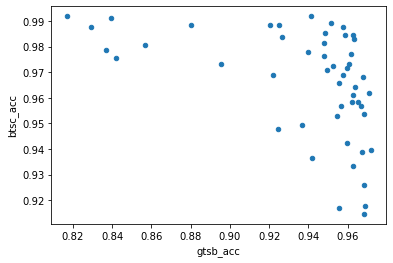

In [8]:
df.plot('gtsb_acc', 'btsc_acc', kind='scatter')

<AxesSubplot:xlabel='gtsb_bd', ylabel='btsc_bd'>

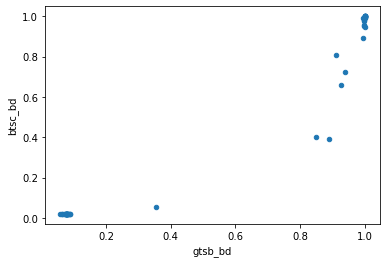

In [9]:
df.plot('gtsb_bd', 'btsc_bd', kind='scatter')

/tmp/ipykernel_57402/2682989243.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels([f'{y*100:.0f}%' for y in ax[0].get_yticks()])


[Text(0, 0.8, '80%'),
 Text(0, 0.8500000000000001, '85%'),
 Text(0, 0.9, '90%'),
 Text(0, 0.9500000000000001, '95%'),
 Text(0, 1.0, '100%')]

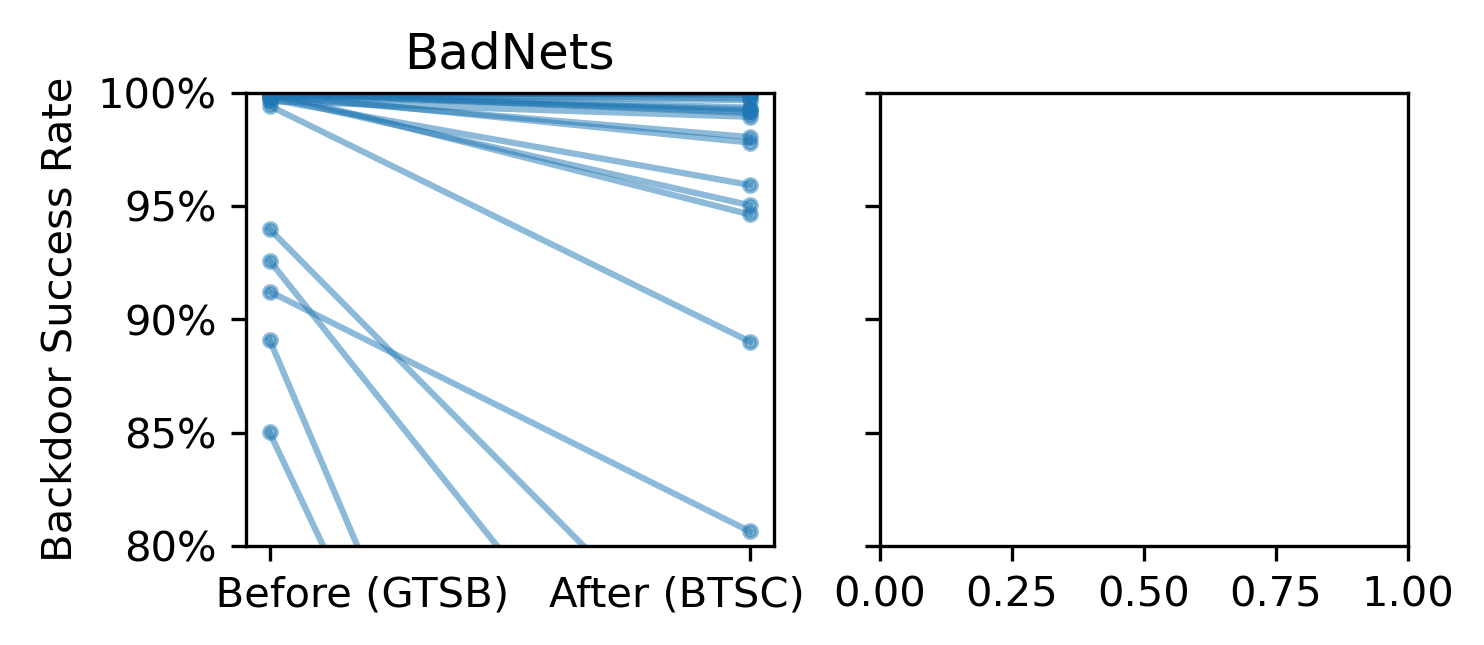

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 300

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(5, 2))
for _,row in df.iterrows():
    ax[0].plot([0, 1], [row['gtsb_bd'], row['btsc_bd']], alpha=0.5, c='tab:blue', marker='.')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['              Before (GTSB)', 'After (BTSC)           '])
ax[0].set_ylabel('Backdoor Success Rate')
ax[0].set_title('BadNets')
ax[0].set_ylim(0.8, 1.0)
ax[0].set_yticklabels([f'{y*100:.0f}%' for y in ax[0].get_yticks()])

## GTSB Handcrafted -> BTSC Finetuning

In [11]:
tm2_gtsb_handcrafted = list(conn['tm2_v3:handcrafted'].find({}))
tm2_btsc_handcrafted = list(conn['tm2_v3_btsc_handcrafted:finetune'].find({}))

In [12]:
data = []

for model in tm2_gtsb_handcrafted:
    if not model['success']:
        print('failed')
        continue
    
    res = model['result']
    
    # Find the associate finetuned result
    ft_result = list(conn['tm2_v3_btsc_handcrafted:finetune'].find({'original_model': res['weights']}))
    if len(ft_result) != 1:
        print(len(ft_result), '???')
        continue
        
    ft_res = ft_result[0]['stats']
#     print(ft_res.keys())
    
    
    print(f"{res['test_stats']['test_eval_acc']:.4f} {res['test_bd_stats']['test_bd_acc']:.4f} -> "\
          f"{ft_res['test_stats']['test_eval_acc']:.4f} {ft_res['test_bd_stats']['test_bd_acc']:.4f}")
    
    data.append([
        res['test_stats']['test_eval_acc'],
        res['test_bd_stats']['test_bd_acc'],
        ft_res['test_stats']['test_eval_acc'],
        ft_res['test_bd_stats']['test_bd_acc']
    ])
#     break

0.9687 0.0763 -> 0.9487 0.0203
0.9712 0.0777 -> 0.9105 0.0203
failed
0.9714 0.0769 -> 0.9194 0.0195
0.9207 0.9875 -> 0.9162 0.0203
0.8137 0.0035 -> 0.9211 0.0195
0.9683 0.0767 -> 0.9268 0.0195
0.9675 0.0759 -> 0.9194 0.0195
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
0.6873 0.0000 -> 0.9365 0.0195
failed
0.9055 0.3270 -> 0.9243 0.0366
0.9575 0.0683 -> 0.9447 0.0212
0.9566 0.1237 -> 0.9284 0.0203
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
f

In [13]:
df_hc = pd.DataFrame(data)
df_hc.columns = ['gtsb_acc', 'gtsb_bd', 'btsc_acc', 'btsc_bd']
df_hc.head()

,gtsb_acc,gtsb_bd,btsc_acc,btsc_bd
0,0.968712,0.076278,0.948739,0.020342
1,0.971166,0.077710,0.910496,0.020342
2,0.971370,0.076892,0.919447,0.019528
3,0.920654,0.987526,0.916192,0.020342
4,0.813701,0.003476,0.921074,0.019528


<AxesSubplot:xlabel='gtsb_bd', ylabel='btsc_bd'>

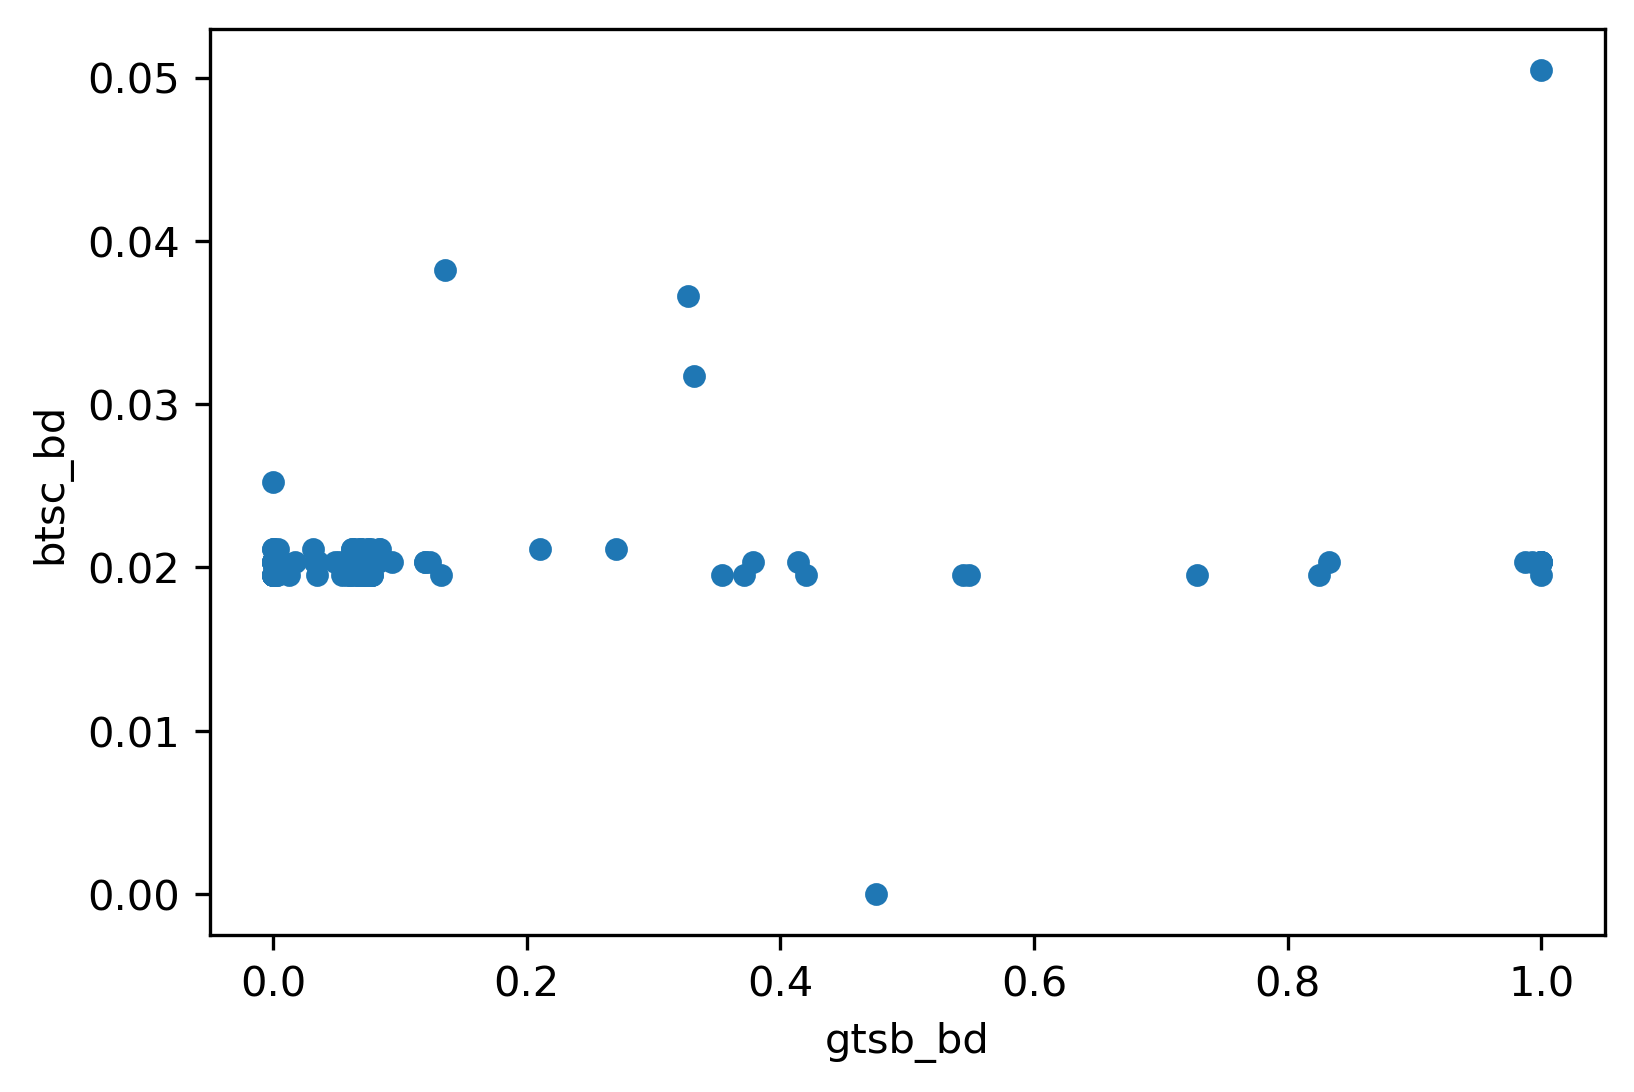

In [14]:
df_hc.plot('gtsb_bd', 'btsc_bd', kind='scatter')

/tmp/ipykernel_57402/1541067501.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels([f'{y*100:.0f}%' for y in ax[0].get_yticks()])


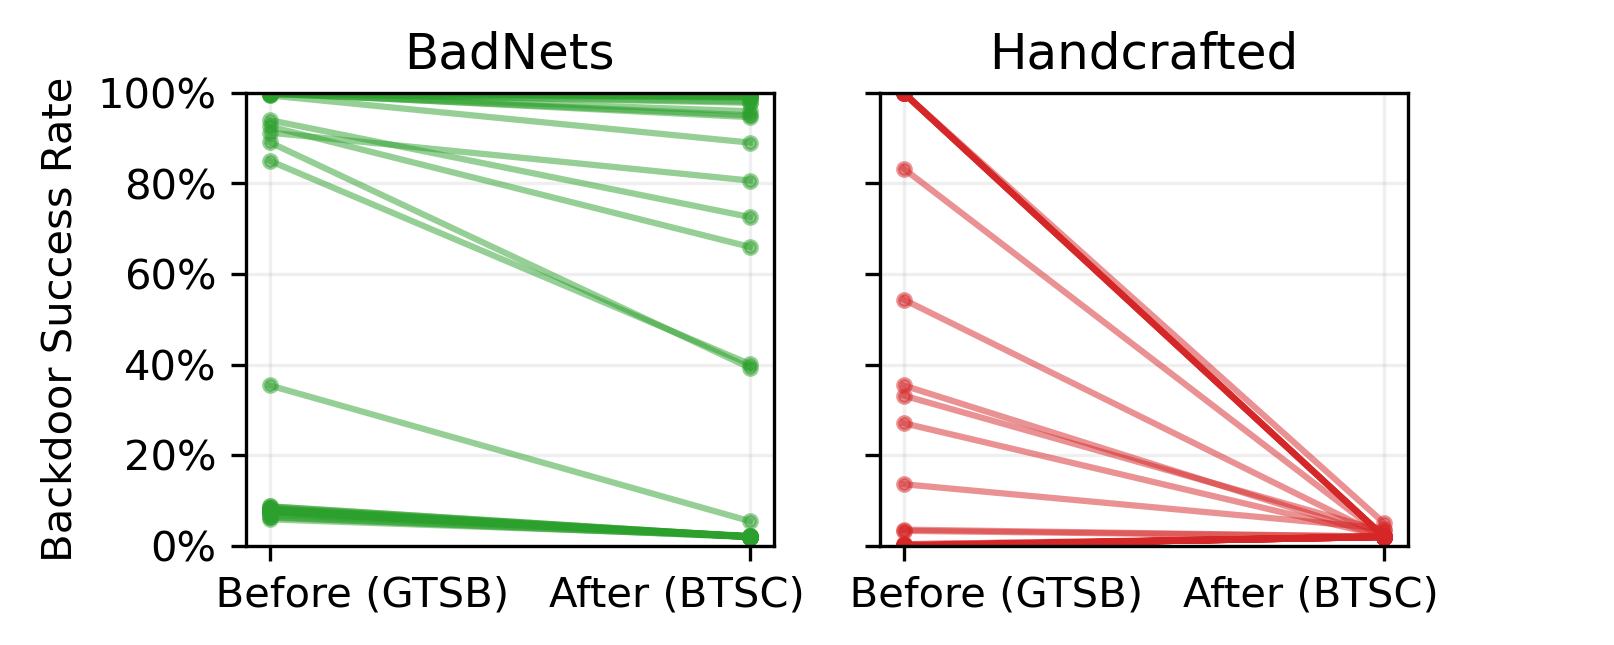

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 300

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(5, 2))
for _,row in df.iterrows():
    ax[0].plot([0, 1], [row['gtsb_bd'], row['btsc_bd']], alpha=0.5, c='tab:green', marker='.')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['              Before (GTSB)', 'After (BTSC)           '])
ax[0].set_ylabel('Backdoor Success Rate')
ax[0].set_title('BadNets')
ax[0].set_ylim(0, 1.0)
ax[0].set_yticklabels([f'{y*100:.0f}%' for y in ax[0].get_yticks()])

for _,row in df_hc.sort_values('gtsb_acc')[:50].iterrows():
    ax[1].plot([0, 1], [row['gtsb_bd'], row['btsc_bd']], alpha=0.5, c='tab:red', marker='.')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['              Before (GTSB)', 'After (BTSC)           '])
# ax[1].set_ylabel('Backdoor Success Rate')
ax[1].set_title('Handcrafted')
ax[0].grid(alpha=0.2)
ax[1].grid(alpha=0.2)

# ax[0].set_xlim(-0.2, 1.2)
# ax[0].boxplot(df_hc['gtsb_bd'], positions=[0])

# plt.tight_layout()
plt.savefig('tm2_backdoorperf.pdf',bbox_inches='tight')
plt.show()

In [30]:
df_hc['gtsb_bd'].describe()

count    185.000000
mean       0.139611
std        0.242639
min        0.000000
25%        0.054397
50%        0.071984
75%        0.076892
max        1.000000
Name: gtsb_bd, dtype: float64

In [31]:
tm2_btsc_clean_ex = list(conn['tm2_v3_btsc:clean'].find({}))[0]

def flatten_dict(d):
    d2 = {}
    for v in d.values():
        d2.update(v)
    return d2

# Dummy row - before training statistics
pre_train_stats = {'train_eval_loss': 100, 'train_eval_acc': 0.1, 'test_eval_loss': 100, 'test_eval_acc': 0.1,
       'test_bd_loss': 100, 'test_bd_acc': 0}

tm2_btsc_clean_ex = pd.DataFrame([pre_train_stats] + [flatten_dict(d) for d in tm2_btsc_clean_ex['history']])
tm2_btsc_clean_ex

,train_eval_loss,train_eval_acc,test_eval_loss,test_eval_acc,test_bd_loss,test_bd_acc
0,100.000000,0.100000,100.000000,0.100000,100.000000,0.000000
1,2.268571,0.147745,2.267935,0.173312,2.192342,0.000000
2,2.119786,0.170036,2.096244,0.222132,1.978581,0.000000
3,1.428356,0.723173,1.411529,0.653377,2.383002,0.306753
4,0.713143,0.753758,0.803211,0.777868,3.424025,0.000000
5,0.510104,0.797823,0.478036,0.801465,5.739326,0.000000
6,0.364661,0.865215,0.482048,0.753458,6.082455,0.218877
7,0.180637,0.963712,0.264004,0.927583,7.394155,0.043938
8,0.135348,0.964230,0.238668,0.917819,7.829710,0.048007
9,0.114059,0.973043,0.202126,0.946298,8.040318,0.041497


In [32]:
tm2_btsc_badnet_exs = list(conn['tm2_v3_btsc_badnet:finetune'].find(
    { "stats_pretrain.test_bd_stats.test_bd_acc" : { '$gt' : 0.99 } }
))
tm2_btsc_badnet_exs

[{'_id': ObjectId('623b1300f9c6368bc116deff'),
  'args': {'prefix': 'tm2_v3_btsc_badnet',
   'dataset': 'BTSC',
   'trials': 1,
   'seed': 0,
   'load_model': 'weights/tm2_v3_TEST:*.pth',
   'trigger': "checkerboard('bottomleft', (3, 3), colours=(255, 0))",
   'backdoor_class': 6,
   'mongo_url': 'mongodb://100.83.104.36:27017/',
   'weights_path': 'weights',
   'epochs': 20,
   'learning_rate': 0.01,
   'device': 'cuda',
   'no_batchnorm': False,
   'use_wandb': False,
   'no_annealing': False,
   'no_dataaug': False},
  'history': [{'train_stats': {'train_eval_loss': 0.15492014660407774,
     'train_eval_acc': 0.9538621047174702},
    'test_stats': {'test_eval_loss': 0.6672817380090581,
     'test_eval_acc': 0.8429617575264443},
    'test_bd_stats': {'test_bd_loss': 0.040529613779816835,
     'test_bd_acc': 0.9845402766476811}},
   {'train_stats': {'train_eval_loss': 0.06402829367601776,
     'train_eval_acc': 0.9787454639709694},
    'test_stats': {'test_eval_loss': 0.44487038469239

In [33]:
# Find an example of GTSB Badnet -> BTSC Finetune with initial backdoor>0.9
tm2_btsc_badnet_exs = list(conn['tm2_v3_btsc_badnet:finetune'].find(
#     { "stats_pretrain.test_bd_stats.test_bd_acc" : { '$gt' : 0.95 } }
    { "stats_pretrain.test_bd_stats.test_bd_acc" : { '$gt' : 0.9 }, "stats_pretrain.test_stats.test_eval_acc" : { '$gt' : 0.5 } }
))
len(tm2_btsc_badnet_exs)
tm2_btsc_badnet_ex = tm2_btsc_badnet_exs[0]

tm2_btsc_badnet_ex = pd.DataFrame([flatten_dict(tm2_btsc_badnet_ex['stats_pretrain'])] + [flatten_dict(d) for d in tm2_btsc_badnet_ex['history']])
tm2_btsc_badnet_ex

,train_eval_loss,train_eval_acc,test_eval_loss,test_eval_acc,test_bd_loss,test_bd_acc
0,0.602179,0.868844,1.642005,0.681855,0.034603,0.987795
1,0.085784,0.975117,0.303167,0.869813,0.106078,0.963385
2,0.043453,0.987558,0.192295,0.911310,0.166944,0.940602
3,0.061139,0.980819,0.083014,0.974776,0.208707,0.927583
4,0.021821,0.992224,0.089138,0.962571,0.224456,0.920260
5,0.016759,0.994816,0.096105,0.956876,0.210377,0.928397
6,0.017354,0.993779,0.082907,0.965012,0.263240,0.909683
7,0.011446,0.995334,0.102645,0.952807,0.259405,0.910496
8,0.010910,0.995853,0.083634,0.962571,0.272803,0.901546
9,0.008505,0.997408,0.099159,0.952807,0.290423,0.895850


In [34]:
# Find an example of GTSB Handcrafted -> BTSC Finetune with initial backdoor>0.9
tm2_btsc_hc_exs = list(conn['tm2_v3_btsc_handcrafted:finetune'].find(
#     { "stats_pretrain.test_bd_stats.test_bd_acc" : { '$gt' : 0.9 }, "stats_pretrain.test_bd_stats.test_eval_acc" : { '$gt' : 0.0 }}
{ "stats_pretrain.test_bd_stats.test_bd_acc" : { '$gt' : 0.9 }, "stats_pretrain.test_stats.test_eval_acc" : { '$gt' : 0.5 } }
))
len(tm2_btsc_hc_exs)
tm2_btsc_hc_ex = tm2_btsc_hc_exs[0]

tm2_btsc_hc_ex = pd.DataFrame([flatten_dict(tm2_btsc_hc_ex['stats_pretrain'])] + [flatten_dict(d) for d in tm2_btsc_hc_ex['history']])
tm2_btsc_hc_ex

,train_eval_loss,train_eval_acc,test_eval_loss,test_eval_acc,test_bd_loss,test_bd_acc
0,2.309564,0.657854,2.403972,0.531326,8.729726e-10,1.000000
1,0.089964,0.974598,0.580909,0.877136,1.120980e+01,0.019528
2,0.050211,0.983411,0.494166,0.882018,1.212074e+01,0.019528
3,0.035911,0.987040,0.404768,0.886900,1.258368e+01,0.019528
4,0.027401,0.989632,0.349479,0.888527,1.265762e+01,0.019528
5,0.019298,0.990669,0.262230,0.891782,1.256185e+01,0.019528
6,0.015543,0.994298,0.205581,0.904801,1.240663e+01,0.019528
7,0.012450,0.996371,0.183467,0.911310,1.252791e+01,0.019528
8,0.009631,0.997408,0.186239,0.911310,1.259275e+01,0.019528
9,0.008456,0.997926,0.146634,0.933279,1.239941e+01,0.019528


In [35]:
len(list(conn['tm2_v3_btsc_badnet:finetune'].find({'stats_pretrain': {}})))

0

In [36]:
list(conn['tm2_v3_btsc_badnet:finetune'].find({}))[0].keys()

dict_keys(['_id', 'args', 'history', 'weights', 'stats', 'original_model', 'stats_pretrain'])

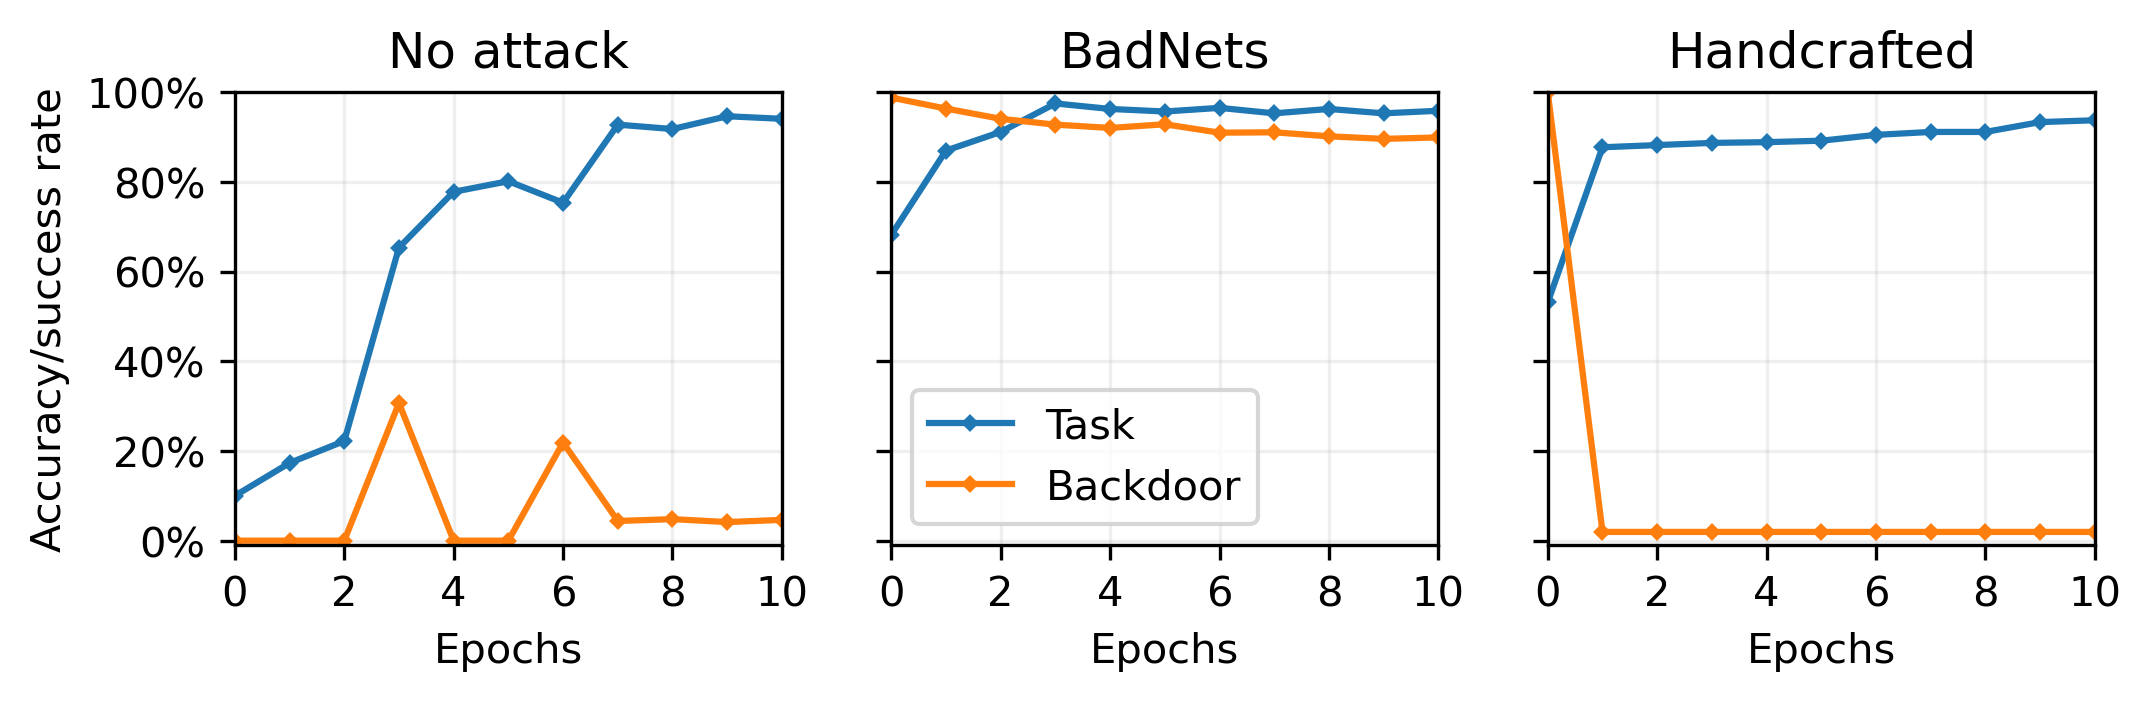

In [37]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 300

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(8, 2))

for i, df in enumerate([tm2_btsc_clean_ex, tm2_btsc_badnet_ex, tm2_btsc_hc_ex]):
    ax[i].plot(df['test_eval_acc'], label='Task', marker='D', markersize=2)
    ax[i].plot(df['test_bd_acc'], label='Backdoor', marker='D', markersize=2)
    ax[i].set_xlim(0, 10)
    ax[i].set_xticks([0, 2, 4, 6, 8, 10])
    ax[i].set_xlabel('Epochs')
    
    ax[i].grid(alpha=0.2)

# ax[0].plot(tm2_btsc_clean_ex['test_eval_acc'])
# ax[0].plot(tm2_btsc_clean_ex['test_bd_acc'])
# ax[0].set_xlim(0, 10)

# ax[1].plot(tm2_btsc_badnet_ex['test_eval_acc'])
# ax[1].plot(tm2_btsc_badnet_ex['test_bd_acc'])
# ax[1].set_xlim(0, 10)

# ax[2].plot(tm2_btsc_hc_ex['test_eval_acc'])
# ax[2].plot(tm2_btsc_hc_ex['test_bd_acc'])
# ax[2].set_xlim(0, 10)

ax[0].set_title('No attack')
ax[1].set_title('BadNets')
ax[2].set_title('Handcrafted')-

ax[0].set_ylim(-0.01, 1)
ax[0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax[0].set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
ax[0].set_ylabel('Accuracy/success rate')

ax[1].legend()
plt.savefig('./tm2_epochs.pdf',bbox_inches='tight')